In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
titanic_data=pd.read_csv('train.csv')

In [4]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split= StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived","Pclass","Sex"]]):
    strat_train_set=titanic_data.loc[train_indices]
    strat_test_set=titanic_data.loc[test_indices]

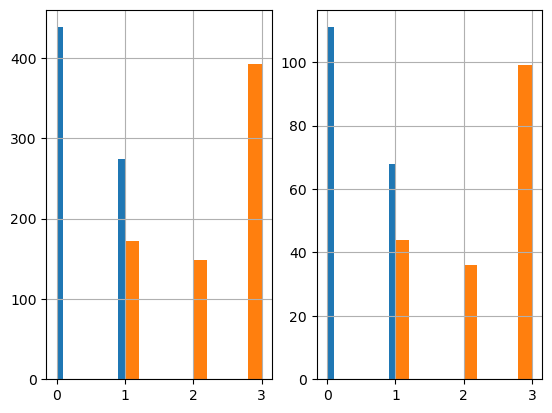

In [6]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer=SimpleImputer(strategy="mean")
        X['Age']=imputer.fit_transform(X[['Age']])
        return X

In [8]:
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X,y=None):
        return self
    
    def transform(self, X):
        encoder=OneHotEncoder()
        matrix=encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names=["C","S","Q","N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
            
        matrix= encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names=["Female","Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
            
        return X

In [9]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [10]:
from sklearn.pipeline import Pipeline

pipeline= Pipeline([("ageimputer", AgeImputer()),
                   ("featureencoder", FeatureEncoder()),
                   ("featuredropper", FeatureDropper())])

In [11]:
strat_train_set= pipeline.fit_transform(strat_train_set)

In [12]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
317,318,0,2,54.000000,0,0,14.0000,0.0,0.0,1.0,0.0,1.0
790,791,0,3,29.829704,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
668,669,0,3,43.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
486,487,1,1,35.000000,1,0,90.0000,0.0,0.0,1.0,1.0,0.0
863,864,0,3,29.829704,8,2,69.5500,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
169,170,0,3,28.000000,0,0,56.4958,0.0,0.0,1.0,0.0,1.0
215,216,1,1,31.000000,1,0,113.2750,1.0,0.0,0.0,1.0,0.0
369,370,1,1,24.000000,0,0,69.3000,1.0,0.0,0.0,1.0,0.0
196,197,0,3,29.829704,0,0,7.7500,0.0,1.0,0.0,0.0,1.0


In [13]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 317 to 31
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [14]:
from sklearn.preprocessing import StandardScaler

X=strat_train_set.drop(['Survived'], axis=1)
y=strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data =y.to_numpy()

In [15]:
X_data

array([[-5.12898542e-01, -3.70196244e-01,  1.83853384e+00, ...,
         6.31522936e-01, -7.35612358e-01,  7.35612358e-01],
       [ 1.31675307e+00,  8.27893418e-01, -2.70240144e-16, ...,
        -1.58347376e+00, -7.35612358e-01,  7.35612358e-01],
       [ 8.44834470e-01,  8.27893418e-01,  1.00180962e+00, ...,
         6.31522936e-01, -7.35612358e-01,  7.35612358e-01],
       ...,
       [-3.11752911e-01, -1.56828591e+00, -4.43441309e-01, ...,
        -1.58347376e+00,  1.35941164e+00, -1.35941164e+00],
       [-9.80948954e-01,  8.27893418e-01, -2.70240144e-16, ...,
        -1.58347376e+00, -7.35612358e-01,  7.35612358e-01],
       [-1.61919952e+00, -1.56828591e+00, -2.70240144e-16, ...,
        -1.58347376e+00,  1.35941164e+00, -1.35941164e+00]])

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf= RandomForestClassifier()

param_grid=[
    {"n_estimators":[10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search= GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [17]:
final_clf = grid_search.best_estimator_

In [18]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=500)

In [19]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [22]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
192,193,1,3,19.000000,1,0,7.8542,0.0,0.0,1.0,1.0,0.0
490,491,0,3,29.163714,1,0,19.9667,0.0,0.0,1.0,0.0,1.0
607,608,1,1,27.000000,0,0,30.5000,0.0,0.0,1.0,0.0,1.0
23,24,1,1,28.000000,0,0,35.5000,0.0,0.0,1.0,0.0,1.0
375,376,1,1,29.163714,1,0,82.1708,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
712,713,1,1,48.000000,1,0,52.0000,0.0,0.0,1.0,0.0,1.0
713,714,0,3,29.000000,0,0,9.4833,0.0,0.0,1.0,0.0,1.0
465,466,0,3,38.000000,0,0,7.0500,0.0,0.0,1.0,0.0,1.0
715,716,0,3,19.000000,0,0,7.6500,0.0,0.0,1.0,0.0,1.0


In [25]:
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

Scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [26]:
final_clf.score(X_data_test, y_data_test)

0.8100558659217877

In [28]:
final_data = pipeline.fit_transform(titanic_data)

In [29]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [32]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [33]:
prod_clf= RandomForestClassifier()

param_grid=[
    {"n_estimators":[10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search= GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [34]:
prod_final_clf = grid_search.best_estimator_

In [35]:
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=200)

In [36]:
titanic_test_data=pd.read_csv("test.csv")

In [38]:
final_test_data=pipeline.fit_transform(titanic_test_data)

In [40]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [41]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [42]:
predictions = prod_final_clf.predict(X_data_final_test)

In [44]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("predictions.csv", index=False)

In [46]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
